In [13]:
import numpy as np
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler




df=pd.read_csv("heart disease classification dataset.csv")
df.head()
df.isnull().sum()

impute = SimpleImputer(missing_values=np.nan, strategy='mean')
impute.fit(df[['chol']])
df[['chol']] = impute.transform(df[['chol']])

impute.fit(df[['trestbps']])
df[['trestbps']] = impute.transform(df[['trestbps']])
df.isnull().sum()

impute.fit(df[['thalach']])
df[['thalach']] = impute.transform(df[['thalach']])
df.isnull().sum()
enc = LabelEncoder()
df['sex'] = enc.fit_transform(df['sex'])
df['target'] = enc.fit_transform(df['target'])
df.head()



scaler = MinMaxScaler()

scaler.fit(df)

# transform data
df_scaled = scaler.transform(df)
df_scaled

df.columns

df=pd.DataFrame(df_scaled,columns=df.columns)

del df["Unnamed: 0"]


feature=df.loc[:,'age':'thal']
label=df['target']


In [14]:
#Logistic Regression
 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split






In [15]:
x_train, x_test, y_train, y_test = train_test_split(feature, label, test_size=0.2, random_state=22)

In [17]:
#Train the model
model = LogisticRegression()
model.fit(x_train, y_train) #Training the model
predictions = model.predict(x_test)
print(predictions)# printing predictions
accuracyscore=accuracy_score(y_test, predictions)
print( accuracyscore)

[1. 1. 1. 0. 1. 1. 1. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 0. 1. 0. 1. 0.
 0. 1. 1. 1. 0. 0. 1. 0. 0. 0. 1. 0. 0. 1. 1. 1. 0. 1. 1. 0. 1. 0. 0. 1.
 0. 1. 0. 1. 0. 0. 0. 0. 1. 0. 1. 1. 1.]
0.819672131147541


In [22]:
#Decision Tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

clf = DecisionTreeClassifier(criterion='entropy',random_state=1)
clf.fit(x_train,y_train)
y_pred = clf.predict(x_test)
score=accuracy_score(y_pred,y_test)
print(y_pred)
print(score)

[1. 1. 1. 0. 1. 1. 1. 0. 0. 0. 1. 1. 0. 0. 1. 1. 1. 0. 1. 1. 1. 0. 0. 0.
 1. 1. 1. 1. 0. 0. 1. 0. 1. 0. 1. 0. 0. 1. 0. 1. 1. 1. 1. 0. 1. 1. 0. 1.
 1. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 1. 1.]
0.7377049180327869


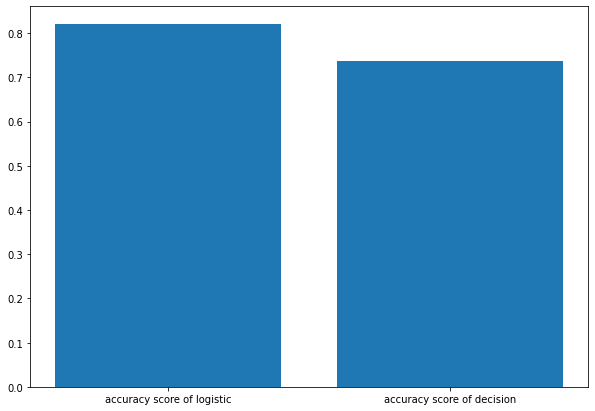

In [28]:

import pandas as pd
from matplotlib import pyplot as plt
 
# Read CSV into pandas
 
# Figure Size
fig = plt.figure(figsize =(10, 7))
 
# Horizontal Bar Plot
plt.bar(x=["accuracy score of logistic","accuracy score of decision"], height = [accuracyscore,score])
 
# Show Plot
plt.show()